# Data Wrangling & Analysis 


## Introduction

The purpose of this project is to put in practice what I learned in data wrangling data section from Udacity Data Analysis Nanodegree program.  The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. 

## Gathering Data

**1. Twitter archive file**

In [32]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json 
import seaborn as sns


In [33]:
#Read CSV file 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [34]:
twitter_archive.sort_values('timestamp')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None



**2. Twitter tsv file - Image Predictions**

In [35]:
#URL downloaded programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**3. Data through Twitter API** <br>
Since twitter did not approve my developer account I have used the supporting files in Udacity page

In [ ]:

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)





After getting the data in JSON format and stored in file. We will write it in dataframe

In [37]:


# Load Twitter API data
df_list = []

with open('tweet_json.txt', 'r', encoding='utf8') as f:
    for line in f:
        tweet_line = json.loads(line)
        df_list.append({'tweet_id': tweet_line['id'],
                        'retweeted': tweet_line['retweeted'],
                        'favorites': tweet_line['favorite_count'],
                        'retweets': tweet_line['retweet_count']})
        
twitter_api = pd.DataFrame(df_list)
print(twitter_api)

      favorites  retweeted  retweets            tweet_id
0         39467      False      8853  892420643555336193
1         33819      False      6514  892177421306343426
2         25461      False      4328  891815181378084864
3         42908      False      8964  891689557279858688
4         41048      False      9774  891327558926688256
5         20562      False      3261  891087950875897856
6         12041      False      2158  890971913173991426
7         56848      False     16716  890729181411237888
8         28226      False      4429  890609185150312448
9         32467      False      7711  890240255349198849
10        31166      False      7624  890006608113172480
11        28268      False      5156  889880896479866881
12        38818      False      8538  889665388333682689
13        27672      False      4735  889638837579907072
14        15359      False      2321  889531135344209921
15        25652      False      5637  889278841981685760
16        29611      False     

## Assessing Data

### 1. Visual assessment

tsv file

In [38]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


- **p1**: Algorithm's #1 prediction for the image in the tweet → golden retriever
- **p1_conf**: How confident the algorithm is in its #1 prediction → 95%
- **p1_dog**: Whether or not the #1 prediction is a breed of dog → TRUE
- **p2**: Algorithm's second most likely prediction → Labrador retriever
- **p2_conf**: How confident the algorithm is in its #2 prediction → 1%
- **p2_dog**: Whether or not the #2 prediction is a breed of dog → TRUE

#### csv File

In [39]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


- **tweet_id**: The unique identifier for each tweet
- **in_reply_to_status_id**: If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
- **in_reply_to_user_id**: If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID. This will not necessarily always be the user directly mentioned in the Tweet
- **timestamp**: Date & time when the tweet has been sent
- **source**: Utility used to post the Tweet
- **text**: The actual UTF-8 text of the status update
- **retweeted_status_id / retweeted_status_user_id / retweeted_status_timestamp**: Users can amplify the broadcast of Tweets authored by other users by retweeting . Retweets can be distinguished from typical Tweets by the existence of a retweeted_status attribute. This attribute contains a representation of the original Tweet that was retweeted. Note that retweets of retweets do not show representations of the intermediary retweet, but only the original Tweet. (Users can also unretweet a retweet they created by deleting their retweet.)
- **expanded_urls**: URL where the tweet can be found
- **rating_numerator**: The top number of a fraction
- **rating_denominator**: The bottom number of a fraction
- **name**: The name of the dog
- **doggo / floofer / pupper / puppo**: Dog ages & stages

#### JSON file

In [40]:
twitter_api

,favorites,retweeted,retweets,tweet_id
0,39467,False,8853,892420643555336193
1,33819,False,6514,892177421306343426
2,25461,False,4328,891815181378084864
3,42908,False,8964,891689557279858688
4,41048,False,9774,891327558926688256
5,20562,False,3261,891087950875897856
6,12041,False,2158,890971913173991426
7,56848,False,16716,890729181411237888
8,28226,False,4429,890609185150312448
9,32467,False,7711,890240255349198849


### Programmatic assessment

Pandas' functions and/or methods are used to assess the data.

In [41]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [42]:
sum(twitter_archive['tweet_id'].duplicated())

0

In [43]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [44]:
print(twitter_archive.loc[twitter_archive.rating_numerator == 204, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 143, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 666, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 1176, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator == 144, 'text'])

1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object
1634    Two sneaky puppers were not initially seen, mo...
Name: text, dtype: object
189    @s8n You tried very hard to portray this good ...
Name: text, dtype: object
Series([], Name: text, dtype: object)
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object


In [45]:
#print whole text in order to verify numerators and denominators
print(twitter_archive['text'][1120]) #17 dogs
print(twitter_archive['text'][1634]) #13 dogs
print(twitter_archive['text'][313]) #just a tweet to explain actual ratings, this will be ignored when cleaning data
print(twitter_archive['text'][189]) #no picture, this will be ignored when cleaning data
print(twitter_archive['text'][1779]) #12 dogs

Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq


In [46]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [47]:
print(twitter_archive.loc[twitter_archive.rating_denominator == 11, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 2, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 16, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 15, 'text'])
print(twitter_archive.loc[twitter_archive.rating_denominator == 7, 'text'])

784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
1663    I'm aware that I could've said 20/16, but here...
Name: text, dtype: object
342    @docmisterio account started on 11/15/15
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object


In [48]:
print(twitter_archive['text'][784]) #retweet - it will be deleted when delete all retweets
print(twitter_archive['text'][1068]) #actual rating 14/10 need to change manually
print(twitter_archive['text'][1662]) #actual rating 10/10 need to change manually
print(twitter_archive['text'][2335]) #actual rating 9/10 need to change manually
print(twitter_archive['text'][1663]) # tweet to explain rating
print(twitter_archive['text'][342]) #no rating - delete
print(twitter_archive['text'][516]) #no rating - delete

RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
@docmisterio account started on 11/15/15
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


In [49]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1936,860184849394610176,https://pbs.twimg.com/media/C-_9jWWUwAAnwkd.jpg,1,chimpanzee,0.267612,False,gorilla,0.104293,False,orangutan,0.059908,False
1107,723673163800948736,https://pbs.twimg.com/media/CgsA5eFWgAAu0qn.jpg,1,golden_retriever,0.839390,True,Labrador_retriever,0.065706,True,hand_blower,0.012941,False
81,667470559035432960,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1,toy_poodle,0.304175,True,pug,0.223427,True,Lakeland_terrier,0.073316,True
1537,790698755171364864,https://pbs.twimg.com/media/CvkgUjbUsAEvo7l.jpg,1,Bernese_mountain_dog,0.996541,True,EntleBucher,0.001057,True,Appenzeller,0.000998,True
1637,806542213899489280,https://pbs.twimg.com/media/CzFp3FNW8AAfvV8.jpg,1,vizsla,0.938617,True,Brittany_spaniel,0.036739,True,Chesapeake_Bay_retriever,0.003971,True
412,673919437611909120,https://pbs.twimg.com/media/CVo-JuMWwAAet6F.jpg,1,jack-o'-lantern,0.172079,False,schipperke,0.115984,True,miniature_pinscher,0.052175,True
494,675710890956750848,https://pbs.twimg.com/media/CWCbd8ZWoAAtqoH.jpg,2,standard_schnauzer,0.441427,True,miniature_schnauzer,0.248885,True,Sealyham_terrier,0.164967,True
711,685315239903100929,https://pbs.twimg.com/media/CYK6kf0WMAAzP-0.jpg,2,chow,0.470162,True,Pomeranian,0.159677,True,Eskimo_dog,0.105074,True
608,680070545539371008,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,1,earthstar,0.127701,False,Shih-Tzu,0.121811,True,bubble,0.117820,False
1758,825535076884762624,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,1,Rottweiler,0.681495,True,Tibetan_mastiff,0.147940,True,black-and-tan_coonhound,0.024525,True


In [50]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [51]:
sum(image_prediction.jpg_url.duplicated())

66

In [52]:
pd.concat(g for _, g in image_prediction.groupby("jpg_url") if len(g) > 1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [53]:
print(image_prediction.p1_dog.value_counts())
print(image_prediction.p2_dog.value_counts())
print(image_prediction.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [54]:
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [55]:
twitter_api.head()

,favorites,retweeted,retweets,tweet_id
0,39467,False,8853,892420643555336193
1,33819,False,6514,892177421306343426
2,25461,False,4328,891815181378084864
3,42908,False,8964,891689557279858688
4,41048,False,9774,891327558926688256


In [56]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorites    2354 non-null int64
retweeted    2354 non-null bool
retweets     2354 non-null int64
tweet_id     2354 non-null int64
dtypes: bool(1), int64(3)
memory usage: 57.5 KB


In [57]:
twitter_api.describe()

,favorites,retweets,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


### Tidiness 

1. Change tweet_id to type int64 in order to merge with the other 2 tables (changing ID to integr )
- All tables should be part of one dataset - Combining all datasets to one dataset


### Quality




#### image_prediction
1. Create 1 column for image prediction and 1 column for confidence level 
2. Drop duplicated images - (Deleting duplicated values)
3. Delete columns that won't be used for analysis 

#### twitter_archive
1. Delete columns that won't be used for analysis
2. Keep original ratings that have images (Delete retweets)
3. Correct numerators with decimals
4. Correc denominators other than 10:
5. Separate timestamp into catogires day - month - year
6. Erroneous datatypes (doggo, floofer..etc colomns 

#### tweet_json
1. Keep original tweets only



## Cleaning Data

In [58]:
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = twitter_api.copy()

**1. Tidiness** - 
Define : Change tweet_id to type int64 in order to merge with the other 2 tables

##### Code

In [59]:
#CODE: change tweet_id from str to int
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype(int)


###### Test

In [60]:
tweet_json_clean['tweet_id'].dtypes

dtype('int32')

#### image_prediction
Define <br>
1. Create 1 column for image prediction and for confidence level

##### Code

In [61]:
#keep the first true prediction along the confidence level as new columns.
# the first true prediction (p1, p2 or p3) will be store in these lists

dog_types = []
confidence_list = []

#This function is to capture the dog type and confidence level
# from the first 'true' prediction
def image(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_types.append(image_prediction_clean['p1'])
        confidence_list.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        dog_types.append(image_prediction_clean['p2'])
        confidence_list.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_types.append(image_prediction_clean['p3'])
        confidence_list.append(image_prediction_clean['p3_conf'])
    else:
        dog_types.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
image_prediction_clean.apply(image, axis=1)

#create new columns
image_prediction_clean['dog_types'] = dog_types
image_prediction_clean['confidence_list'] = confidence_list

In [62]:
#drop rows that has prediction_list 'error'
image_prediction_clean = image_prediction_clean[image_prediction_clean['dog_types'] != 'Error']



###### Test

In [63]:

image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id           1751 non-null int64
jpg_url            1751 non-null object
img_num            1751 non-null int64
p1                 1751 non-null object
p1_conf            1751 non-null float64
p1_dog             1751 non-null bool
p2                 1751 non-null object
p2_conf            1751 non-null float64
p2_dog             1751 non-null bool
p3                 1751 non-null object
p3_conf            1751 non-null float64
p3_dog             1751 non-null bool
dog_types          1751 non-null object
confidence_list    1751 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 169.3+ KB


##### Delete duplicate rows
<br>
Define: <br>
Dropping duplicates

##### Code

In [64]:
# Delete duplicated jpg_url
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')



###### Test

In [65]:

sum(image_prediction_clean['jpg_url'].duplicated())

0

#### Delete unused columns 

Define : Delete unwanted coulomns 


##### Code

In [66]:
# print list of image_prediction columns
print(list(image_prediction_clean))

#Delete columns
image_prediction_clean = image_prediction_clean.drop(['img_num', 
                                                      'p1_conf', 'p1_dog', 
                                                       'p2_conf', 
                                                      'p2_dog', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)



['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_types', 'confidence_list']


##### Test

In [67]:

list(image_prediction_clean)

['tweet_id', 'jpg_url', 'p1', 'p2', 'p3', 'dog_types', 'confidence_list']

### Twitter archive 

##### Keep original tweets

Define: Drop retweeted tweets

##### Code

In [68]:
# Delete retweets by filtering the NaN of retweeted_status_user_id
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]


##### Test

In [69]:

print(sum(twitter_archive_clean.retweeted_status_user_id.value_counts()))

0


##### Define: Delete unused columns

##### Code

In [70]:
#get the column names of twitter_archive_clean
print(list(twitter_archive_clean))

#CODE: Delete columns no needed
twitter_archive_clean = twitter_archive_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


##### Define: Correct error

##### Code

In [71]:
# Melt the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id',                                          
                                                                'timestamp',
                                                                'text',
                                                                'rating_numerator',
                                                                'rating_denominator',
                                                                'name'],
                               var_name='dogs', value_name='dogs_stage')

# drop dogs
twitter_archive_clean = twitter_archive_clean.drop('dogs', 1)

# Sort by dogs_stage then drop duplicated based on tweet_id except the last occurrence
twitter_archive_clean = twitter_archive_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')



###### Test

In [72]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
2095,667443425659232256,2015-11-19 20:44:47 +0000,Exotic dog here. Long neck. Weird paws. Obsess...,6,10,None,None
2094,667453023279554560,2015-11-19 21:22:56 +0000,Meet Cupcake. I would do unspeakable things fo...,11,10,Cupcake,None
2093,667455448082227200,2015-11-19 21:32:34 +0000,This is Reese and Twips. Reese protects Twips....,7,10,Reese,None
2092,667470559035432960,2015-11-19 22:32:36 +0000,This is a northern Wahoo named Kohl. He runs t...,11,10,a,None
2091,667491009379606528,2015-11-19 23:53:52 +0000,Two dogs in this one. Both are rare Jujitsu Py...,7,10,None,None


##### Define: Correct numerators



##### Code

In [73]:

twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2095 to 7298
Data columns (total 7 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
dogs_stage            2175 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 135.9+ KB


In [74]:

# Change the type int to float to allow decimals 
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

#Update numerators
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26



##### Test

In [75]:

with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\co604\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,text,rating_numerator,rating_denominator
42,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
3685,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
3708,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0
2733,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
4967,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0


##### Define:  Correct denominators other than 10

##### Code

In [76]:
# Create a new column with rating in float type to avoid converting all int column to float
twitter_archive_clean['rating'] = 10 * twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator'].astype(float)



###### Test

In [77]:

twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage,rating
2095,667443425659232256,2015-11-19 20:44:47 +0000,Exotic dog here. Long neck. Weird paws. Obsess...,6.0,10.0,None,None,6.0
2094,667453023279554560,2015-11-19 21:22:56 +0000,Meet Cupcake. I would do unspeakable things fo...,11.0,10.0,Cupcake,None,11.0
2093,667455448082227200,2015-11-19 21:32:34 +0000,This is Reese and Twips. Reese protects Twips....,7.0,10.0,Reese,None,7.0
2092,667470559035432960,2015-11-19 22:32:36 +0000,This is a northern Wahoo named Kohl. He runs t...,11.0,10.0,a,None,11.0
2091,667491009379606528,2015-11-19 23:53:52 +0000,Two dogs in this one. Both are rare Jujitsu Py...,7.0,10.0,None,None,7.0


##### Define: Convert to datetime

###### Code

In [78]:
#convert timestamp to datetime
twitter_archive_clean
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#extract year, month and day to new columns
twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month
twitter_archive_clean['day'] = twitter_archive_clean['timestamp'].dt.day

#drop timestamp column
twitter_archive_clean = twitter_archive_clean.drop('timestamp', 1)


###### Test

In [79]:

twitter_archive_clean.head()



,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,rating,year,month,day
2095,667443425659232256,Exotic dog here. Long neck. Weird paws. Obsess...,6.0,10.0,None,None,6.0,2015,11,19
2094,667453023279554560,Meet Cupcake. I would do unspeakable things fo...,11.0,10.0,Cupcake,None,11.0,2015,11,19
2093,667455448082227200,This is Reese and Twips. Reese protects Twips....,7.0,10.0,Reese,None,7.0,2015,11,19
2092,667470559035432960,This is a northern Wahoo named Kohl. He runs t...,11.0,10.0,a,None,11.0,2015,11,19
2091,667491009379606528,Two dogs in this one. Both are rare Jujitsu Py...,7.0,10.0,None,None,7.0,2015,11,19


**2. Tidiness, Define:** - All tables should be part of one dataset

##### Code

In [80]:
#CODE: create a new dataframe that merge twitter_archive_clean and 
#image_prediction_clean
df_twitter_clean = pd.merge(twitter_archive_clean, 
                      image_prediction_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
df_twitter_clean = df_twitter_clean[df_twitter_clean['jpg_url'].notnull()]


###### Test

In [81]:

df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 1 to 2174
Data columns (total 16 columns):
tweet_id              1626 non-null int64
text                  1626 non-null object
rating_numerator      1626 non-null float64
rating_denominator    1626 non-null float64
name                  1626 non-null object
dogs_stage            1626 non-null object
rating                1626 non-null float64
year                  1626 non-null int64
month                 1626 non-null int64
day                   1626 non-null int64
jpg_url               1626 non-null object
p1                    1626 non-null object
p2                    1626 non-null object
p3                    1626 non-null object
dog_types             1626 non-null object
confidence_list       1626 non-null object
dtypes: float64(3), int64(4), object(9)
memory usage: 216.0+ KB


### Storing, Analyzing, and Visualizing Data

In [82]:
df_twitter_clean.to_csv('twitter_archive_main.csv', 
                 index=False, encoding = 'utf-8')

### Insights & visualization

Golden retriever is the most common dog in this dataset.

In [83]:
df_twitter_clean['dog_types'].value_counts()

golden_retriever                  143
Labrador_retriever                103
Pembroke                           94
Chihuahua                          87
pug                                60
toy_poodle                         50
chow                               45
Pomeranian                         42
Samoyed                            38
malamute                           32
Chesapeake_Bay_retriever           31
French_bulldog                     30
cocker_spaniel                     26
miniature_pinscher                 24
Eskimo_dog                         22
German_shepherd                    21
Shih-Tzu                           20
Staffordshire_bullterrier          20
Siberian_husky                     20
Shetland_sheepdog                  19
Rottweiler                         19
beagle                             19
Cardigan                           19
Maltese_dog                        19
kuvasz                             18
Lakeland_terrier                   17
basset      

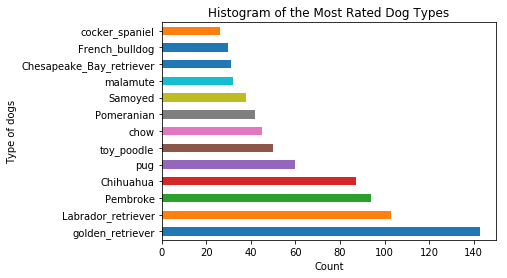

In [84]:
df_dog_type = df_twitter_clean.groupby('dog_types').filter(lambda x: len(x) >= 25)

df_dog_type['dog_types'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Types')
plt.xlabel('Count')
plt.ylabel('Type of dogs')

fig = plt.gcf() 
fig.savefig('outputDogTypes.png',bbox_inches='tight');

###### The repartition of the dog stages

In [85]:
dogstages_count = df_twitter_clean['dogs_stage'].value_counts()
dogstages_count

None       1375
pupper      171
doggo        51
puppo        21
floofer       8
Name: dogs_stage, dtype: int64

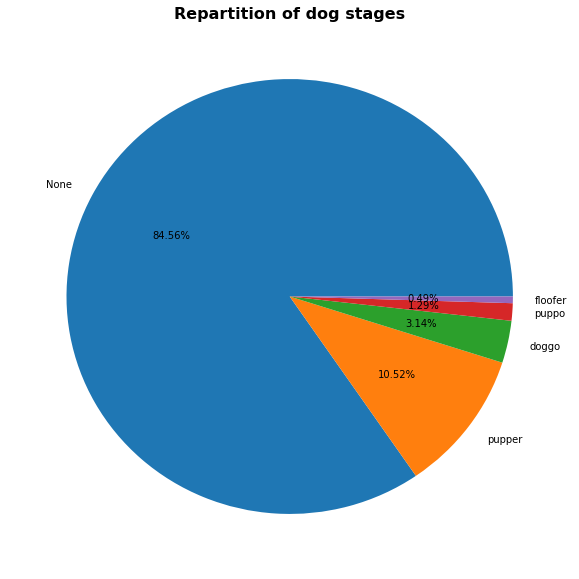

In [86]:
# Shows the repartition of the dog stages with a pie chart.
dogstages_count.sort_values(ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(10,10))
plt.ylabel('')
plt.title('Repartition of dog stages', weight='bold', fontsize=16)
plt.savefig('DogStages.png')

###### Dog_types with low number of ratings show a high variaty of mean ratings. 

In [87]:
df_dog_type_count = df_twitter_clean.groupby('dog_types').count()
df_dog_type_count

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,rating,year,month,day,jpg_url,p1,p2,p3,confidence_list
dog_types,,,,,,,,,,,,,,,
Afghan_hound,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Airedale,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
American_Staffordshire_terrier,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Appenzeller,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Australian_terrier,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Bedlington_terrier,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Bernese_mountain_dog,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Blenheim_spaniel,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Border_collie,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12


In [88]:
df_dog_type_mean = df_twitter_clean.groupby('dog_types').mean()

dog_type_count = df_dog_type_count['rating']
dog_type_mean = df_dog_type_mean['rating']
dog_type_mean

dog_types
Afghan_hound                       8.000000
Airedale                           9.833333
American_Staffordshire_terrier    10.312500
Appenzeller                       11.000000
Australian_terrier                11.500000
Bedlington_terrier                10.333333
Bernese_mountain_dog              11.272727
Blenheim_spaniel                  11.100000
Border_collie                     10.583333
Border_terrier                    12.142857
Boston_bull                        9.416667
Bouvier_des_Flandres              13.000000
Brabancon_griffon                 10.000000
Brittany_spaniel                  10.375000
Cardigan                          11.105263
Chesapeake_Bay_retriever          10.838710
Chihuahua                         10.406479
Dandie_Dinmont                     9.571429
Doberman                          11.333333
English_setter                     9.714286
English_springer                  10.555556
EntleBucher                       11.000000
Eskimo_dog            

In [89]:
df = pd.DataFrame()
df['dog_type_count'] = dog_type_count
df['dog_type_mean'] = dog_type_mean
df

,dog_type_count,dog_type_mean
dog_types,,
Afghan_hound,2,8.000000
Airedale,12,9.833333
American_Staffordshire_terrier,16,10.312500
Appenzeller,2,11.000000
Australian_terrier,2,11.500000
Bedlington_terrier,6,10.333333
Bernese_mountain_dog,11,11.272727
Blenheim_spaniel,10,11.100000
Border_collie,12,10.583333


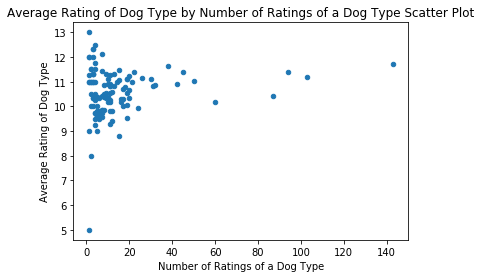

In [90]:
df.plot(x='dog_type_count', y='dog_type_mean', kind='scatter')
plt.xlabel('Number of Ratings of a Dog Type')
plt.ylabel('Average Rating of Dog Type')
plt.title('Average Rating of Dog Type by Number of Ratings of a Dog Type Scatter Plot')

fig = plt.gcf()
fig.savefig('output2.png',bbox_inches='tight');

##### Most predictible breed

In [91]:
p1_count = df_twitter_clean['p1'].value_counts().head(10)
p1_count

golden_retriever      128
Labrador_retriever     90
Pembroke               87
Chihuahua              75
pug                    52
chow                   38
Pomeranian             38
Samoyed                37
toy_poodle             37
malamute               28
Name: p1, dtype: int64

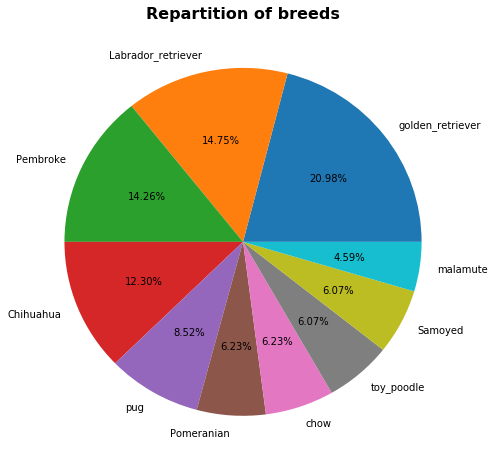

In [92]:
# Shows the repartition of the breeds with a pie chart.

p1_count.sort_values(ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8))
plt.ylabel('')
plt.title('Repartition of breeds', weight='bold', fontsize=16)
plt.savefig('Breeds_Repartition.png')